# Data Flow 

The type of data flowing through model connections may be in different form such as real or vector of reals. Below are given some examples illustration different forms for data flow throuhg connections. 

## Single Pin Real Data Flow 

Let us assume that we have simple model consisting of just a generataor `gen` and a writer `writer`. Let us also assume that the output `y(t)` of the `gen` is

```math 
    x(t) = sin(t)
```

 Note that the generator has a **single real** output of type real. Let us construct the model: 

In [6]:
using Causal

# Construct the model
@defmodel model begin 
    @nodes begin 
        gen = FunctionGenerator(readout = t -> sin(t), output=ScalarOutport(1))
        writer = Writer(input=ScalarInport(1))
    end 
    @branches begin 
        gen => writer 
    end
end 

`ScalarOutport(1)` means that output data to be written to the output port is of scalar, i.e., real and the length of output is 1. Similarly `ScalarInport(1)` means that the input data to be read from the input port is scalar, i.e. real and the lenghth of the input is 1. 

Now, let us simulate the model 

In [7]:
sim = simulate!(model, 0., 0.01, 10.)  # Simulation for 10 seconds with a step size of 0.01.

[ Info: 2020-09-06T22:59:37.412 Started simulation...
[ Info: 2020-09-06T22:59:37.714 Inspecting model...
[ Info: 2020-09-06T22:59:38.059 Done.
[ Info: 2020-09-06T22:59:38.059 Initializing the model...
[ Info: 2020-09-06T22:59:38.389 Done...
[ Info: 2020-09-06T22:59:38.615 Running the simulation...
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
[ Info: 2020-09-06T22:59:40.601 Done...
[ Info: 2020-09-06T22:59:40.601 Terminating the simulation...
[ Info: 2020-09-06T22:59:40.76 Done.


Simulation(state:done, retcode:success, path:/tmp/Simulation-ec1ee5b3-6c35-4926-85c8-99e76ac67557)

We can read back the data from the `writer`, 

In [8]:
t, x = read(getcomponent(model, :writer))

(Union{Missing, Float64}[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.5, 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57, 9.58, 9.59], Union{Missing, Float64}[0.0, 0.009999833334166664, 0.01999866669333308, 0.02999550020249566, 0.03998933418663416, 0.04997916927067833, 0.059964006479444595, 0.06994284733753277, 0.0799146939691727, 0.08987854919801104  …  -0.0751511204618093, -0.08511891830453426, -0.09507820432636095, -0.10502798260698659, -0.11496725817687455, -0.12489503711675232, -0.1348103266569955, -0.14471213527691454, -0.15459947280389894, -0.16447135051243542])

We get the time `t` which is of a vector of reals and `x` which is a vector of reals also.

In [13]:
t

960-element Array{Union{Missing, Float64},1}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 9.48
 9.49
 9.5
 9.51
 9.52
 9.53
 9.54
 9.55
 9.56
 9.57
 9.58
 9.59

In [16]:
x

960-element Array{Union{Missing, Float64},1}:
  0.0
  0.009999833334166664
  0.01999866669333308
  0.02999550020249566
  0.03998933418663416
  0.04997916927067833
  0.059964006479444595
  0.06994284733753277
  0.0799146939691727
  0.08987854919801104
  0.09983341664682815
  0.10977830083717481
  0.11971220728891936
  ⋮
 -0.05519397715107451
 -0.0651758075696639
 -0.0751511204618093
 -0.08511891830453426
 -0.09507820432636095
 -0.10502798260698659
 -0.11496725817687455
 -0.12489503711675232
 -0.1348103266569955
 -0.14471213527691454
 -0.15459947280389894
 -0.16447135051243542

Now let us plot the  simulation data. 

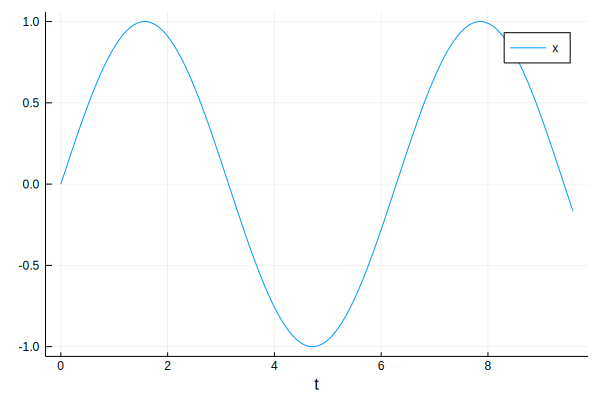

In [22]:
using Plots; theme(:default)

plot(t, x, xlabel="t", label="x")

## Single Pin Vector Data Flow

Assume that the generator generates output `x` of the form 

```math
x(t) = [sin(t), cos(t)]
```

The generator generates outputs of type vector. When triggered, the output value to be written to the output port of the generator is a **single vector**. Therefore the length of the output is 1 and the type of the data to be written to the port is vector. Let us construct, simulate and read the simulation data.

In [24]:
# Construct the model
@defmodel model begin 
    @nodes begin 
        gen = FunctionGenerator(readout = t -> [sin(t), cos(t)], output=VectorOutport(1))
        writer = Writer(input=VectorInport(1))
    end 
    @branches begin 
        gen => writer 
    end
end 

# Simulate the model 
sim = simulate!(model, 0., 0.01, 10.)

# Read the simulation data 
t, x = read(getcomponent(model, :writer))

[ Info: 2020-09-06T23:13:47.303 Started simulation...
[ Info: 2020-09-06T23:13:47.303 Inspecting model...
[ Info: 2020-09-06T23:13:47.316 Done.
[ Info: 2020-09-06T23:13:47.316 Initializing the model...
[ Info: 2020-09-06T23:13:47.402 Done...
[ Info: 2020-09-06T23:13:47.415 Running the simulation...
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: 2020-09-06T23:13:47.451 Done...
[ Info: 2020-09-06T23:13:47.451 Terminating the simulation...
[ Info: 2020-09-06T23:13:47.454 Done.


(Union{Missing, Float64}[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.5, 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57, 9.58, 9.59], Union{Missing, Array{Float64,1}}[[0.0, 1.0], [0.009999833334166664, 0.9999500004166653], [0.01999866669333308, 0.9998000066665778], [0.02999550020249566, 0.9995500337489875], [0.03998933418663416, 0.9992001066609779], [0.04997916927067833, 0.9987502603949663], [0.059964006479444595, 0.9982005399352042], [0.06994284733753277, 0.9975510002532796], [0.0799146939691727, 0.9968017063026194], [0.08987854919801104, 0.9959527330119943]  …  [-0.0751511204618093, -0.9971721561963784], [-0.08511891830453426, -0.9963707993245617], [-0.09507820432636095, -0.9954698062031188], [-0.10502798260698659, -0.9944692669306109], [-0.11496725817687455, -0.9933692815601315], [-0.12489503711675232, -0.9921699600893009], [-0.1348103266569955, -0.9908714224492672], [-0.14471213527691454, -0.989473798492712], [-0.15459947280389894, -0.9879772279808662], [-0.16447135051

`t` is a vector of reals and `x` is the vector of vectors as shown. 

In [25]:
t

960-element Array{Union{Missing, Float64},1}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 9.48
 9.49
 9.5
 9.51
 9.52
 9.53
 9.54
 9.55
 9.56
 9.57
 9.58
 9.59

In [26]:
x 

960-element Array{Union{Missing, Array{Float64,1}},1}:
 [0.0, 1.0]
 [0.009999833334166664, 0.9999500004166653]
 [0.01999866669333308, 0.9998000066665778]
 [0.02999550020249566, 0.9995500337489875]
 [0.03998933418663416, 0.9992001066609779]
 [0.04997916927067833, 0.9987502603949663]
 [0.059964006479444595, 0.9982005399352042]
 [0.06994284733753277, 0.9975510002532796]
 [0.0799146939691727, 0.9968017063026194]
 [0.08987854919801104, 0.9959527330119943]
 [0.09983341664682815, 0.9950041652780258]
 [0.10977830083717481, 0.9939560979566968]
 [0.11971220728891936, 0.9928086358538663]
 ⋮
 [-0.05519397715107451, -0.9984756506226111]
 [-0.0651758075696639, -0.9978737966835496]
 [-0.0751511204618093, -0.9971721561963784]
 [-0.08511891830453426, -0.9963707993245617]
 [-0.09507820432636095, -0.9954698062031188]
 [-0.10502798260698659, -0.9944692669306109]
 [-0.11496725817687455, -0.9933692815601315]
 [-0.12489503711675232, -0.9921699600893009]
 [-0.1348103266569955, -0.9908714224492672]
 [-0.144712

Let us plot the data 

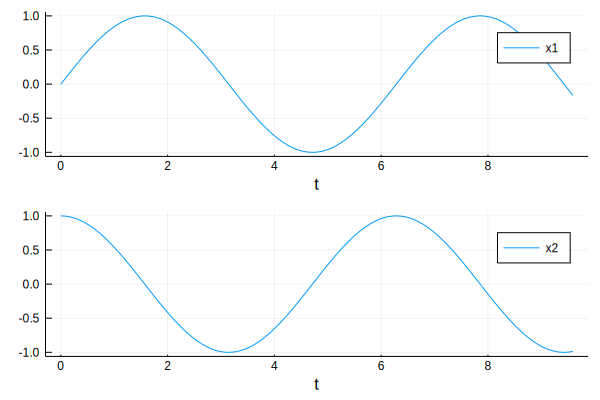

In [30]:
plt = plot(layout=(2,1))
plot!(t, getindex.(x, 1), subplot=1, xlabel="t", label="x1")
plot!(t, getindex.(x, 2), subplot=2, xlabel="t", label="x2")

## Multiple Pins Real Data Flow

Now consider that `gen` generates outputs of the form
```math 
x(t) = sin(t), cos(t)
```
Note that the type of the output is **tuple** which implies that `gen` has multiple outputs. The length of tuple is the length of its output. When triggered, `gen` writes two outputs each of which are of type real. 

The following script simulates this case.

In [32]:
# Construct the model
@defmodel model begin 
    @nodes begin 
        gen = FunctionGenerator(readout = t -> (sin(t), cos(t)), output=ScalarOutport(2))
        writer = Writer(input=ScalarInport(2))
    end 
    @branches begin 
        gen => writer 
    end
end 

# Simulate the model 
sim = simulate!(model, 0., 0.01, 10.)

# Read the simulation data 
t, x = read(getcomponent(model, :writer))

[ Info: 2020-09-06T23:21:57.259 Started simulation...
[ Info: 2020-09-06T23:21:57.259 Inspecting model...
[ Info: 2020-09-06T23:21:57.297 Done.
[ Info: 2020-09-06T23:21:57.297 Initializing the model...
[ Info: 2020-09-06T23:21:57.383 Done...
[ Info: 2020-09-06T23:21:57.393 Running the simulation...
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: 2020-09-06T23:21:57.429 Done...
[ Info: 2020-09-06T23:21:57.43 Terminating the simulation...
[ Info: 2020-09-06T23:21:57.433 Done.


(Union{Missing, Float64}[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.5, 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57, 9.58, 9.59], ([0.0, 0.009999833334166664, 0.01999866669333308, 0.02999550020249566, 0.03998933418663416, 0.04997916927067833, 0.059964006479444595, 0.06994284733753277, 0.0799146939691727, 0.08987854919801104  …  -0.0751511204618093, -0.08511891830453426, -0.09507820432636095, -0.10502798260698659, -0.11496725817687455, -0.12489503711675232, -0.1348103266569955, -0.14471213527691454, -0.15459947280389894, -0.16447135051243542], [1.0, 0.9999500004166653, 0.9998000066665778, 0.9995500337489875, 0.9992001066609779, 0.9987502603949663, 0.9982005399352042, 0.9975510002532796, 0.9968017063026194, 0.9959527330119943  …  -0.9971721561963784, -0.9963707993245617, -0.9954698062031188, -0.9944692669306109, -0.9933692815601315, -0.9921699600893009, -0.9908714224492672, -0.989473798492712, -0.9879772279808662, -0.986381860569534]))

Note that `x` is now a tuple 

In [34]:
typeof(x)

Tuple{Array{Float64,1},Array{Float64,1}}

The first element of `x` corresponds the data flowing through the first pin, and the second element of `x` corresponds the data flowing through the second pin of the output port of `gen`.

In [35]:
x[1]

960-element Array{Float64,1}:
  0.0
  0.009999833334166664
  0.01999866669333308
  0.02999550020249566
  0.03998933418663416
  0.04997916927067833
  0.059964006479444595
  0.06994284733753277
  0.0799146939691727
  0.08987854919801104
  0.09983341664682815
  0.10977830083717481
  0.11971220728891936
  ⋮
 -0.05519397715107451
 -0.0651758075696639
 -0.0751511204618093
 -0.08511891830453426
 -0.09507820432636095
 -0.10502798260698659
 -0.11496725817687455
 -0.12489503711675232
 -0.1348103266569955
 -0.14471213527691454
 -0.15459947280389894
 -0.16447135051243542

In [36]:
x[2]

960-element Array{Float64,1}:
  1.0
  0.9999500004166653
  0.9998000066665778
  0.9995500337489875
  0.9992001066609779
  0.9987502603949663
  0.9982005399352042
  0.9975510002532796
  0.9968017063026194
  0.9959527330119943
  0.9950041652780258
  0.9939560979566968
  0.9928086358538663
  ⋮
 -0.9984756506226111
 -0.9978737966835496
 -0.9971721561963784
 -0.9963707993245617
 -0.9954698062031188
 -0.9944692669306109
 -0.9933692815601315
 -0.9921699600893009
 -0.9908714224492672
 -0.989473798492712
 -0.9879772279808662
 -0.986381860569534

Let us plot the data 

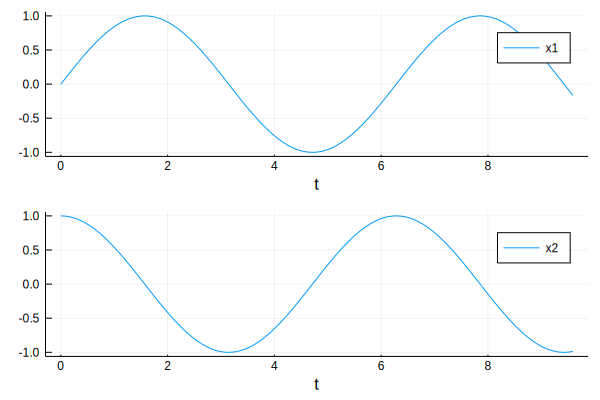

In [37]:
plt = plot(layout=(2,1))
plot!(t, x[1], xlabel="t", label="x1", subplot=1)
plot!(t, x[2], xlabel="t", label="x2", subplot=2)

## Multiple Pins and Vector Data Flow

In this case, consider that `gen` generates output `x` of the form.

```math 
x(t) = [t, 2t], [sin(t), cos(t)]
```
The output port of `gen` is 2 and the type of the data flowing through the pins of the output port is of type vector.

The following scripts illustrates this case. 

In [38]:
# Construct the model
@defmodel model begin 
    @nodes begin 
        gen = FunctionGenerator(readout = t -> ([t, 2t], [sin(t), cos(t)]), output=VectorOutport(2))
        writer = Writer(input=VectorInport(2))
    end 
    @branches begin 
        gen => writer 
    end
end 

# Simulate the model 
sim = simulate!(model, 0., 0.01, 10.)

# Read the simulation data 
t, x = read(getcomponent(model, :writer))

[ Info: 2020-09-06T23:29:04.741 Started simulation...
[ Info: 2020-09-06T23:29:04.741 Inspecting model...
[ Info: 2020-09-06T23:29:04.78 Done.
[ Info: 2020-09-06T23:29:04.781 Initializing the model...
[ Info: 2020-09-06T23:29:04.961 Done...
[ Info: 2020-09-06T23:29:05.055 Running the simulation...
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: 2020-09-06T23:29:05.663 Done...
[ Info: 2020-09-06T23:29:05.663 Terminating the simulation...
[ Info: 2020-09-06T23:29:05.679 Done.


(Union{Missing, Float64}[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.5, 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57, 9.58, 9.59], ([[0.0, 0.0], [0.01, 0.02], [0.02, 0.04], [0.03, 0.06], [0.04, 0.08], [0.05, 0.1], [0.06, 0.12], [0.07, 0.14], [0.08, 0.16], [0.09, 0.18]  …  [9.5, 19.0], [9.51, 19.02], [9.52, 19.04], [9.53, 19.06], [9.54, 19.08], [9.55, 19.1], [9.56, 19.12], [9.57, 19.14], [9.58, 19.16], [9.59, 19.18]], [[0.0, 1.0], [0.009999833334166664, 0.9999500004166653], [0.01999866669333308, 0.9998000066665778], [0.02999550020249566, 0.9995500337489875], [0.03998933418663416, 0.9992001066609779], [0.04997916927067833, 0.9987502603949663], [0.059964006479444595, 0.9982005399352042], [0.06994284733753277, 0.9975510002532796], [0.0799146939691727, 0.9968017063026194], [0.08987854919801104, 0.9959527330119943]  …  [-0.0751511204618093, -0.9971721561963784], [-0.08511891830453426, -0.9963707993245617], [-0.09507820432636095, -0.9954698062031188], [-0.10502798260698659, -0

In [39]:
t 

960-element Array{Union{Missing, Float64},1}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 9.48
 9.49
 9.5
 9.51
 9.52
 9.53
 9.54
 9.55
 9.56
 9.57
 9.58
 9.59

In [40]:
x 

([[0.0, 0.0], [0.01, 0.02], [0.02, 0.04], [0.03, 0.06], [0.04, 0.08], [0.05, 0.1], [0.06, 0.12], [0.07, 0.14], [0.08, 0.16], [0.09, 0.18]  …  [9.5, 19.0], [9.51, 19.02], [9.52, 19.04], [9.53, 19.06], [9.54, 19.08], [9.55, 19.1], [9.56, 19.12], [9.57, 19.14], [9.58, 19.16], [9.59, 19.18]], [[0.0, 1.0], [0.009999833334166664, 0.9999500004166653], [0.01999866669333308, 0.9998000066665778], [0.02999550020249566, 0.9995500337489875], [0.03998933418663416, 0.9992001066609779], [0.04997916927067833, 0.9987502603949663], [0.059964006479444595, 0.9982005399352042], [0.06994284733753277, 0.9975510002532796], [0.0799146939691727, 0.9968017063026194], [0.08987854919801104, 0.9959527330119943]  …  [-0.0751511204618093, -0.9971721561963784], [-0.08511891830453426, -0.9963707993245617], [-0.09507820432636095, -0.9954698062031188], [-0.10502798260698659, -0.9944692669306109], [-0.11496725817687455, -0.9933692815601315], [-0.12489503711675232, -0.9921699600893009], [-0.1348103266569955, -0.990871422449

In [41]:
typeof(x)

Tuple{Array{Array{Float64,1},1},Array{Array{Float64,1},1}}

In [42]:
x[1]

960-element Array{Array{Float64,1},1}:
 [0.0, 0.0]
 [0.01, 0.02]
 [0.02, 0.04]
 [0.03, 0.06]
 [0.04, 0.08]
 [0.05, 0.1]
 [0.06, 0.12]
 [0.07, 0.14]
 [0.08, 0.16]
 [0.09, 0.18]
 [0.1, 0.2]
 [0.11, 0.22]
 [0.12, 0.24]
 ⋮
 [9.48, 18.96]
 [9.49, 18.98]
 [9.5, 19.0]
 [9.51, 19.02]
 [9.52, 19.04]
 [9.53, 19.06]
 [9.54, 19.08]
 [9.55, 19.1]
 [9.56, 19.12]
 [9.57, 19.14]
 [9.58, 19.16]
 [9.59, 19.18]

In [43]:
x[2]

960-element Array{Array{Float64,1},1}:
 [0.0, 1.0]
 [0.009999833334166664, 0.9999500004166653]
 [0.01999866669333308, 0.9998000066665778]
 [0.02999550020249566, 0.9995500337489875]
 [0.03998933418663416, 0.9992001066609779]
 [0.04997916927067833, 0.9987502603949663]
 [0.059964006479444595, 0.9982005399352042]
 [0.06994284733753277, 0.9975510002532796]
 [0.0799146939691727, 0.9968017063026194]
 [0.08987854919801104, 0.9959527330119943]
 [0.09983341664682815, 0.9950041652780258]
 [0.10977830083717481, 0.9939560979566968]
 [0.11971220728891936, 0.9928086358538663]
 ⋮
 [-0.05519397715107451, -0.9984756506226111]
 [-0.0651758075696639, -0.9978737966835496]
 [-0.0751511204618093, -0.9971721561963784]
 [-0.08511891830453426, -0.9963707993245617]
 [-0.09507820432636095, -0.9954698062031188]
 [-0.10502798260698659, -0.9944692669306109]
 [-0.11496725817687455, -0.9933692815601315]
 [-0.12489503711675232, -0.9921699600893009]
 [-0.1348103266569955, -0.9908714224492672]
 [-0.14471213527691454, -0.

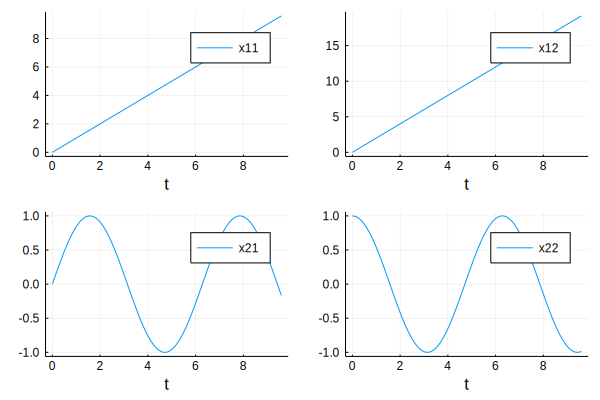

In [50]:
plt = plot(layout=(2, 2))
plot!(t, getindex.(x[1], 1), xlabel="t", label="x11", subplot=1)
plot!(t, getindex.(x[1], 2), xlabel="t", label="x12", subplot=2)
plot!(t, getindex.(x[2], 1), xlabel="t", label="x21", subplot=3)
plot!(t, getindex.(x[2], 2), xlabel="t", label="x22", subplot=4)